In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
sales = pd.read_csv('sales_train_v2.csv')
sales.sort_values(by='date_block_num')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
77133,03.01.2013,0,54,18783,179.0,1.0
77132,02.01.2013,0,54,18761,149.0,1.0
77131,27.01.2013,0,54,18756,399.0,1.0
77130,02.01.2013,0,54,18756,399.0,1.0
77129,31.01.2013,0,54,18753,349.0,1.0
77128,30.01.2013,0,54,18753,349.0,1.0
77127,29.01.2013,0,54,18753,349.0,1.0
77126,28.01.2013,0,54,18753,349.0,1.0
77125,27.01.2013,0,54,18753,349.0,4.0


In [3]:
#sales['item_id'].value_counts()

In [4]:
item6675 = sales[sales['item_id'] == 6675]

#item6675.sort_values(by='date_block_num')

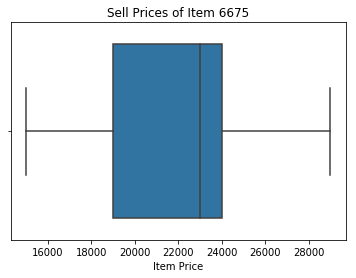

In [5]:
sns.boxplot(x=item6675['item_price'])
plt.title('Sell Prices of Item 6675')
plt.xlabel('Item Price')
plt.show()

# Item 6675
Item 6675 has generated 5,122 sales from November 2013 to October 2015.  It is a rather expensive item compared to many of the items offered, but the price has varied greatly.  It has been listed for as low as \$14,992 and as high as \$28,990, meaning it has sometimes been sold for almost double the price of other sales for the same item.

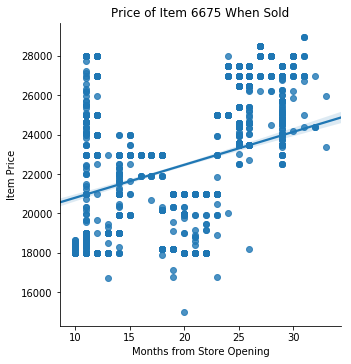

In [6]:
sns.lmplot(x='date_block_num', y='item_price', data=item6675)
plt.title('Price of Item 6675 When Sold')
plt.xlabel('Months from Store Opening')
plt.ylabel('Item Price')
plt.show()

# Price Trends
The pricing strategy changed greatly in the first part of 2014 and again toward the end of 2015.  Price varied greatly for the end of 2013 and into January of 2014.  After January of 2014, there was less variation in price.  The lower end of the range remained the same for the most part, but list prices at the higher end disappeared.  From December 2014 to January 2015, prices increased by several thousand dollars.

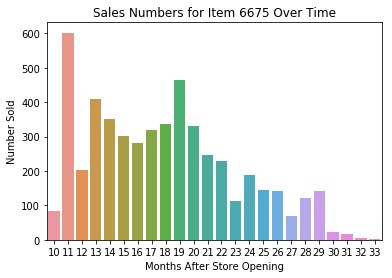

In [7]:
sns.countplot(x='date_block_num', data=item6675)
plt.title('Sales Numbers for Item 6675 Over Time')
plt.xlabel('Months After Store Opening')
plt.ylabel('Number Sold')
plt.show()

# Sales Trends
Item 6675 is not selling nearly as well as it once was.  As prices for item 6675 were rising, sales decreased.  I hypothesize that if item 6675 were able to be sold at a price point just below \$23,000, it would sell much better.

# Experiment Rollout
To gauge the effective of the price change, an A/B test will be implemented. Ten percent of customers will be offered item 6675 at a price of \$22,990 for two weeks. By first limiting the test group to ten percent of customers, if sales do not make up for lower price, lost revenue will be limited.  If the mean number of sales per customer is higher than the mean for the control group, fifty percent of customers will be offered the price of \$22,990 for the next two weeks.  If the mean number of sales per customer is lower in the test group, the experiment will be discontinued.


# Evaluation
Success will be determined by the mean number of sales per customer completed within the test group in comparison to control group. If the resulting p-value from the for the test group is below .05, the potential effect of the price change will be judged to be significant, and the price change will be considered.  If the resulting p-value is above .05, the test will be ruled to be unsuccessful, and a price reduction will not be considered. As a secondary measure, profit within each group will be used.